In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [39]:
#Importing dataset
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv", index_col=0)
df.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [40]:
pd.DataFrame.info(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [41]:
reviewsDf = df[["Rating","Review Text"]]
reviewsDf.head()

,Rating,Review Text
0,4,Absolutely wonderful - silky and sexy and comf...
1,5,Love this dress! it's sooo pretty. i happene...
2,3,I had such high hopes for this dress and reall...
3,5,"I love, love, love this jumpsuit. it's fun, fl..."
4,5,This shirt is very flattering to all due to th...


In [42]:
pd.DataFrame.info(reviewsDf)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rating       23486 non-null  int64 
 1   Review Text  22641 non-null  object
dtypes: int64(1), object(1)
memory usage: 550.5+ KB


In [43]:
#Deleting rows with null values
reviewsDf = reviewsDf.dropna(subset=['Review Text'])

In [44]:
#Resetting index
reviewsDf.index = pd.Series(list(range(reviewsDf.shape[0])))
reviewsDf.head()

,Rating,Review Text
0,4,Absolutely wonderful - silky and sexy and comf...
1,5,Love this dress! it's sooo pretty. i happene...
2,3,I had such high hopes for this dress and reall...
3,5,"I love, love, love this jumpsuit. it's fun, fl..."
4,5,This shirt is very flattering to all due to th...


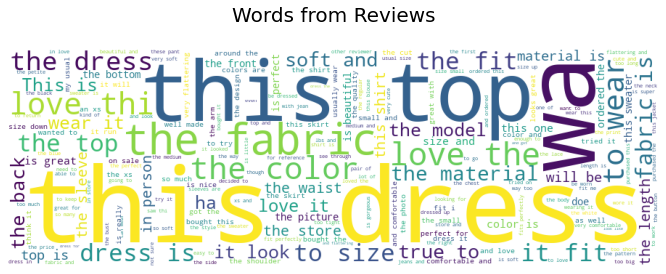

In [45]:
#Plotting the wordclouds
rev = reviewsDf['Review Text']

plt.subplots(figsize=(15,4))
wordcloud = WordCloud(background_color='white', width=900, height=300).generate(" ".join(rev))
plt.imshow(wordcloud)
plt.title('Words from Reviews\n',size=20)
plt.axis('off')
plt.show()

In [46]:
#We can see that "top", "love", "dress" and "shirt" is very used on the reviews
#Removing stop words.
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
!pip install nltk --upgrade
nltk.download('wordnet')

sw = set(stopwords.words('english'))

def preproc(data):
    #converting all to lowercase
    data = data.lower() 
    #Tokenize
    words = RegexpTokenizer(r'[a-z]+').tokenize(data)
    #Deleting stopwords
    words = [w for w in words if not w in sw]
    
    #Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [WordNetLemmatizer().lemmatize(x, pos) for x in words]
    return " ".join(words)

Requirement already up-to-date: nltk in c:\users\user\appdata\local\programs\python\python37\lib\site-packages (3.5)


You should consider upgrading via the 'python -m pip install --upgrade pip' command.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
reviewsDf['New Text'] = reviewsDf['Review Text'].apply(preproc)
reviewsDf.head()

,Rating,Review Text,New Text
0,4,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable
1,5,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happen find store glad ...
2,3,I had such high hopes for this dress and reall...,high hope dress really want work initially ord...
3,5,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ev...
4,5,This shirt is very flattering to all due to th...,shirt flat due adjustable front tie perfect le...


In [48]:
#Creating the sentiment classifier.
#We will create a new column that will consider the ratings as follows:
#Rating 4 or higher: Positive rating 3: Neutral Rating 2 or less: Negative
def polarity (row):
  if row['Rating'] >= 4:
    return 'Positive'
  if row['Rating'] == 3:
    return 'Neutral'
  if row['Rating'] <= 2:
    return 'Negative'

reviewsDf['Class'] = reviewsDf.apply(lambda row: polarity(row), axis=1)
reviewsDf.head()

,Rating,Review Text,New Text,Class
0,4,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable,Positive
1,5,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happen find store glad ...,Positive
2,3,I had such high hopes for this dress and reall...,high hope dress really want work initially ord...,Neutral
3,5,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ev...,Positive
4,5,This shirt is very flattering to all due to th...,shirt flat due adjustable front tie perfect le...,Positive


In [49]:
#Creating train and test base
text, classe = reviewsDf["New Text"], reviewsDf["Class"]
text

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happen find store glad ...
2        high hope dress really want work initially ord...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flat due adjustable front tie perfect le...
                               ...                        
22636    happy snag dress great price easy slip flat cu...
22637    remind maternity clothe soft stretchy shiny ma...
22638    fit well top see never would work glad able tr...
22639    buy dress wed summer cute unfortunately fit pe...
22640    dress lovely platinum feminine fit perfectly e...
Name: New Text, Length: 22641, dtype: object

In [50]:
classe

0        Positive
1        Positive
2         Neutral
3        Positive
4        Positive
           ...   
22636    Positive
22637     Neutral
22638     Neutral
22639     Neutral
22640    Positive
Name: Class, Length: 22641, dtype: object

In [51]:
train_text = text[:16980]
test_text = text[16981:22640]
train_classe = classe[:16980]
test_classe = classe[16981:22640]

In [52]:
#Processing TD-IDF Matrix
#Feature extraction

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(encoding='latin-1')
X_train_counts = count_vect.fit_transform(train_text)
X_train_counts.shape

(16980, 8819)

In [53]:
count_vect.vocabulary_.get('dress')

2297

In [54]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(16980, 8819)

In [55]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, train_classe)

In [56]:
from sklearn.metrics import accuracy_score
X_test_counts = count_vect.transform(test_text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predito = clf.predict(X_test_tfidf)
gaussian_acc = accuracy_score(test_classe, predito)
print(gaussian_acc)

0.7752253048241738


In [57]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

ran = RandomForestClassifier(n_estimators=50)
ran.fit(X_train_tfidf, train_classe)

RandomForestClassifier(n_estimators=50)

In [58]:
#Accuracy score
X_test_counts = count_vect.transform(test_text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predito = ran.predict(X_test_tfidf)
ran_acc = accuracy_score(test_classe, predito)
print(ran_acc)

0.7858278847852977


In [59]:
#Support Vector Machine
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_tfidf, train_classe)

SVC()

In [60]:
#Accuracy score

X_test_counts = count_vect.transform(test_text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predito = svm.predict(X_test_tfidf)
svm_acc = accuracy_score(test_classe, predito)
print(svm_acc)

0.8172822053366319


In [61]:
#Neural network
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier()
nn.fit(X_train_tfidf, train_classe)

MLPClassifier()

In [62]:
#Accuracy score

X_test_counts = count_vect.transform(test_text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predito = nn.predict(X_test_tfidf)
nn_acc = accuracy_score(test_classe, predito)
print(nn_acc)

0.7766389821523237


In [63]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_tfidf, train_classe)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [64]:
#Accuracy score

X_test_counts = count_vect.transform(test_text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predito = lr.predict(X_test_tfidf)
lr_acc = accuracy_score(test_classe, predito)
print(lr_acc)

0.816575366672557


In [65]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Neural Network'],
    'Score': [svm_acc, lr_acc, 
              ran_acc, gaussian_acc, nn_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,0.817282
1,Logistic Regression,0.816575
2,Random Forest,0.785828
4,Neural Network,0.776639
3,Naive Bayes,0.775225
